In [5]:
import geopandas as gpd

# Cargar el GeoJSON desde la URL
url = 'https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson'
gdf = gpd.read_file(url)

# Inspeccionar las columnas disponibles
print(gdf.columns)

# Verificar el CRS actual
print(gdf.crs)

# Reproyectar si el CRS es geográfico (WGS84)
#if gdf.crs.to_string() == 'EPSG:4326':  # CRS en grados
    #gdf = gdf.to_crs('EPSG:32721')  # UTM zona 21S para Buenos Aires

# Calcular áreas en km²
gdf['area_km2'] = gdf.geometry.area / 1e6  # Convertir de m² a km²

# Mostrar nombre del barrio y su área
#print(gdf[['name', 'area_km2']])

# Exportar a un archivo CSV (opcional)
gdf[['name', 'area_km2']].to_csv('barrios_areas.csv', index=False)

C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


Index(['full_id', 'osm_id', 'admin_level', 'boundary', 'wikipedia', 'name',
       'cartodb_id', 'created_at', 'updated_at', 'geometry'],
      dtype='object')
EPSG:4326


C:\Users\mfrch\AppData\Local\Temp\ipykernel_11392\1885634605.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area_km2'] = gdf.geometry.area / 1e6  # Convertir de m² a km²


<Axes: >

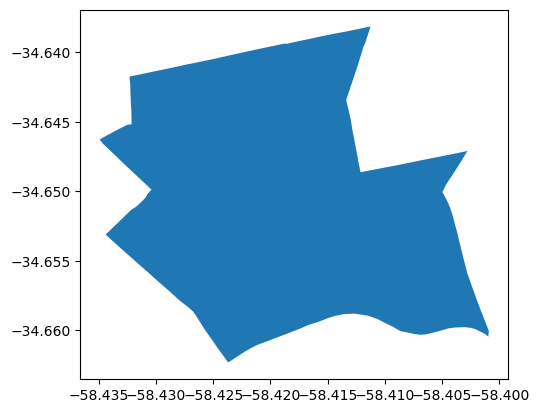

In [29]:
# Mapa base
ss = gdf.iloc[40] # se extrae una serie
sdf = gpd.GeoDataFrame([ss],crs=gdf.crs)
sdf.plot()

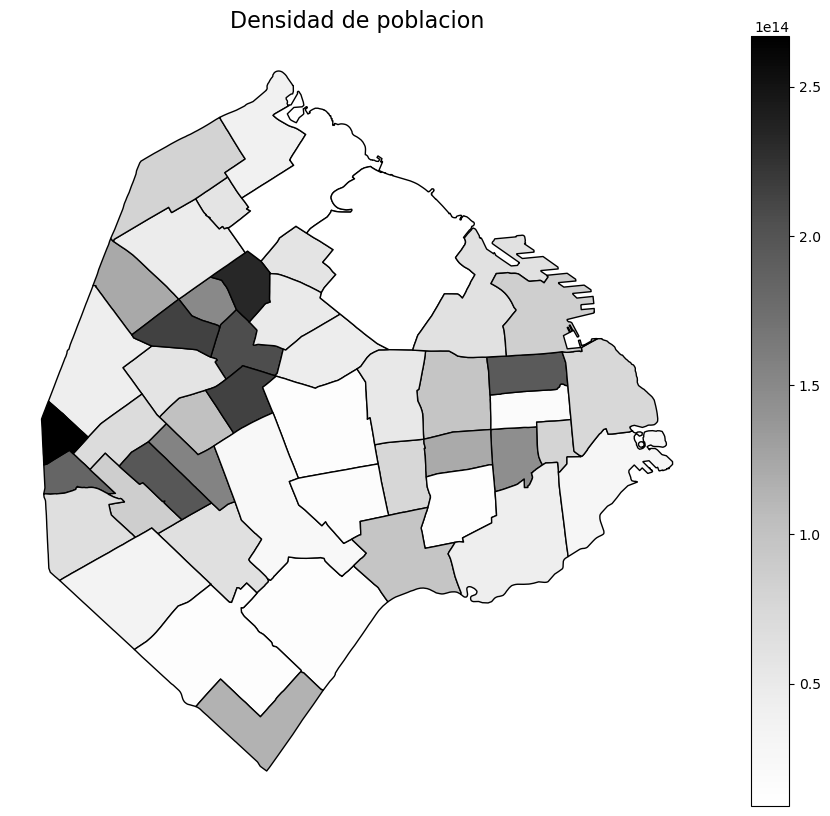

In [43]:
import numpy as np
import matplotlib.pyplot as plt
gdf['poblacion'] = np.random.randint(1000,50000, size=len(gdf))
gdf['densidad'] = gdf['poblacion'] / gdf['area_km2']

# Mapa tematico

fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(column='densidad', cmap='Greys', legend=True,ax=ax, edgecolor='black')
ax.set_title("Densidad de poblacion", fontsize=16)
ax.axis("off")
plt.show()

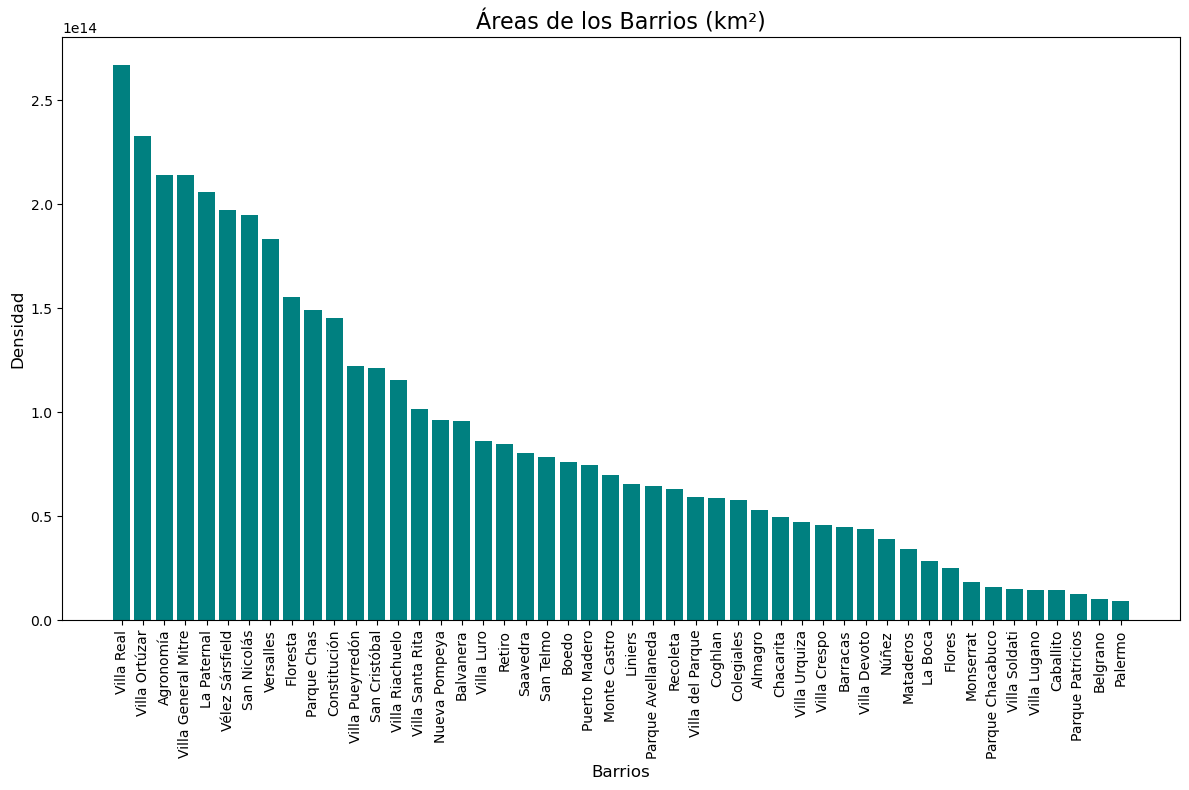

In [49]:
gdf_sorted = gdf.sort_values(by="densidad", ascending=False)
plt.figure(figsize=(12,8))
plt.bar(gdf_sorted['name'],gdf_sorted['densidad'], color='teal')
plt.xticks(rotation=90, fontsize=10)
plt.title("Áreas de los Barrios (km²)", fontsize=16)
plt.xlabel("Barrios", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.tight_layout()
plt.show()